In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report

In [2]:
ionosphere=pd.read_csv("C:/Users/91620/Downloads/inosphere/ionosphere.data",header=None)

In [3]:
ionosphere

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
X=ionosphere.drop(34,axis=1)
y=ionosphere[34]

In [5]:
BATCH_SIZE = 64
TRAIN_SIZE = int(BATCH_SIZE*4)
RANDOM_STATE = 24

np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

EPOCHS = 200 #Number of Epochs
ALPHA = 0.1 # Learning Rate

ES_PATIENCE = 10

LR_FACTOR = 0.9
LR_PATIENCE = 5

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,shuffle=True,random_state=RANDOM_STATE,train_size=TRAIN_SIZE)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((256, 34), (95, 34), (256,), (95,))

In [8]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [38]:
class_name=le.classes_

In [10]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
initializer=tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE)

In [12]:
X_train.shape

(256, 34)

In [14]:
model1=tf.keras.models.Sequential([
    tf.keras.layers.Dense(34,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer),
    tf.keras.layers.Dense(24,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer),
    tf.keras.layers.Dense(14,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer),
    tf.keras.layers.Dense(2)
])

In [18]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
model1.compile(optimizer="Adam",
              loss=loss_fn,
              metrics=["accuracy"])

In [20]:
history=model1.fit(X_train,y_train,validation_data=[X_test,y_test],
                  epochs=EPOCHS,
                  batch_size=BATCH_SIZE,verbose=2)

Epoch 1/200
4/4 - 1s - loss: 0.7112 - accuracy: 0.5469 - val_loss: 0.7091 - val_accuracy: 0.5053 - 852ms/epoch - 213ms/step
Epoch 2/200
4/4 - 0s - loss: 0.6554 - accuracy: 0.6914 - val_loss: 0.6639 - val_accuracy: 0.6632 - 33ms/epoch - 8ms/step
Epoch 3/200
4/4 - 0s - loss: 0.6141 - accuracy: 0.7930 - val_loss: 0.6275 - val_accuracy: 0.7474 - 25ms/epoch - 6ms/step
Epoch 4/200
4/4 - 0s - loss: 0.5789 - accuracy: 0.8359 - val_loss: 0.5986 - val_accuracy: 0.7895 - 26ms/epoch - 7ms/step
Epoch 5/200
4/4 - 0s - loss: 0.5461 - accuracy: 0.8359 - val_loss: 0.5747 - val_accuracy: 0.7895 - 26ms/epoch - 6ms/step
Epoch 6/200
4/4 - 0s - loss: 0.5149 - accuracy: 0.8555 - val_loss: 0.5524 - val_accuracy: 0.7789 - 27ms/epoch - 7ms/step
Epoch 7/200
4/4 - 0s - loss: 0.4841 - accuracy: 0.8672 - val_loss: 0.5313 - val_accuracy: 0.8105 - 26ms/epoch - 6ms/step
Epoch 8/200
4/4 - 0s - loss: 0.4550 - accuracy: 0.8750 - val_loss: 0.5116 - val_accuracy: 0.8105 - 27ms/epoch - 7ms/step
Epoch 9/200
4/4 - 0s - loss: 

Epoch 69/200
4/4 - 0s - loss: 0.0274 - accuracy: 0.9961 - val_loss: 0.3185 - val_accuracy: 0.9158 - 25ms/epoch - 6ms/step
Epoch 70/200
4/4 - 0s - loss: 0.0266 - accuracy: 0.9961 - val_loss: 0.3225 - val_accuracy: 0.9158 - 26ms/epoch - 6ms/step
Epoch 71/200
4/4 - 0s - loss: 0.0261 - accuracy: 0.9961 - val_loss: 0.3234 - val_accuracy: 0.9158 - 24ms/epoch - 6ms/step
Epoch 72/200
4/4 - 0s - loss: 0.0254 - accuracy: 0.9961 - val_loss: 0.3260 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 73/200
4/4 - 0s - loss: 0.0246 - accuracy: 0.9961 - val_loss: 0.3289 - val_accuracy: 0.9053 - 23ms/epoch - 6ms/step
Epoch 74/200
4/4 - 0s - loss: 0.0240 - accuracy: 0.9961 - val_loss: 0.3309 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 75/200
4/4 - 0s - loss: 0.0235 - accuracy: 0.9961 - val_loss: 0.3251 - val_accuracy: 0.9158 - 23ms/epoch - 6ms/step
Epoch 76/200
4/4 - 0s - loss: 0.0229 - accuracy: 0.9961 - val_loss: 0.3249 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 77/200
4/4 - 0s - 

Epoch 136/200
4/4 - 0s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 137/200
4/4 - 0s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.4116 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 138/200
4/4 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.4151 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 139/200
4/4 - 0s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.4086 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 140/200
4/4 - 0s - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 141/200
4/4 - 0s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4173 - val_accuracy: 0.9053 - 23ms/epoch - 6ms/step
Epoch 142/200
4/4 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4133 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 143/200
4/4 - 0s - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4135 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 144/200
4/

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 34)                1190      
                                                                 
 dense_3 (Dense)             (None, 24)                840       
                                                                 
 dense_4 (Dense)             (None, 14)                350       
                                                                 
 dense_5 (Dense)             (None, 2)                 30        
                                                                 
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


In [23]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.711238,0.546875,0.709129,0.505263
1,0.655359,0.691406,0.663888,0.663158
2,0.614066,0.792969,0.627541,0.747368
3,0.578924,0.835938,0.598621,0.789474
4,0.546074,0.835938,0.574716,0.789474
...,...,...,...,...
195,0.001649,1.000000,0.502082,0.894737
196,0.001618,1.000000,0.502440,0.894737
197,0.001582,1.000000,0.506317,0.894737
198,0.001568,1.000000,0.511269,0.894737


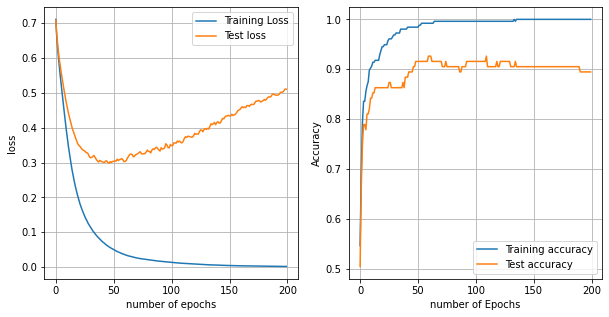

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(hist_df["loss"],label="Training Loss",zorder=3)
plt.plot(hist_df["val_loss"],label="Test loss",zorder=3)
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(hist_df["accuracy"],label="Training accuracy",zorder=3)
plt.plot(hist_df["val_accuracy"],label="Test accuracy",zorder=3)
plt.xlabel("number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [30]:
proba_model1=tf.keras.Sequential([model1,tf.keras.layers.Softmax()])

In [31]:
y_pred=proba_model1(X_train)

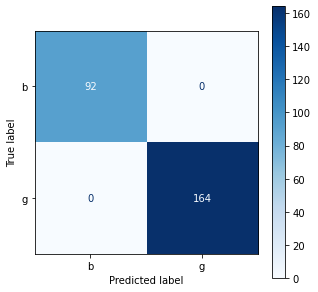

In [39]:
cm=confusion_matrix(y_train,y_pred.numpy().argmax(axis=1))

disp=ConfusionMatrixDisplay(cm,display_labels=class_name)
fig, ax = plt.subplots(figsize = (5,5))

disp.plot(ax = ax, cmap = 'Blues');

In [55]:
y_pred1=proba_model1(X_test)

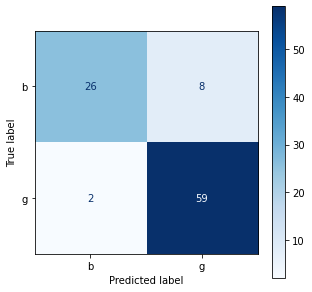

In [42]:
cm=confusion_matrix(y_test,y_pred1.numpy().argmax(axis=1))

disp=ConfusionMatrixDisplay(cm,display_labels=class_name)
fig, ax = plt.subplots(figsize = (5,5))

disp.plot(ax = ax, cmap = 'Blues');

In [44]:
cm

array([[26,  8],
       [ 2, 59]], dtype=int64)

# L2 Regularizer

In [46]:
initializer=tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE)
regularizer=tf.keras.regularizers.L2(0.02)
model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(34,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(24,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(14,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(2)
])

In [47]:
model2.compile(optimizer="Adam",loss=loss_fn,metrics=["accuracy"])

In [49]:
history=model2.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=EPOCHS,
                  batch_size=BATCH_SIZE,
                  verbose=2)

Epoch 1/200
4/4 - 1s - loss: 2.2790 - accuracy: 0.3633 - val_loss: 2.2325 - val_accuracy: 0.3895 - 740ms/epoch - 185ms/step
Epoch 2/200
4/4 - 0s - loss: 2.1891 - accuracy: 0.5938 - val_loss: 2.1571 - val_accuracy: 0.7053 - 33ms/epoch - 8ms/step
Epoch 3/200
4/4 - 0s - loss: 2.1194 - accuracy: 0.8242 - val_loss: 2.0929 - val_accuracy: 0.8105 - 28ms/epoch - 7ms/step
Epoch 4/200
4/4 - 0s - loss: 2.0564 - accuracy: 0.8359 - val_loss: 2.0342 - val_accuracy: 0.8211 - 27ms/epoch - 7ms/step
Epoch 5/200
4/4 - 0s - loss: 1.9949 - accuracy: 0.8633 - val_loss: 1.9778 - val_accuracy: 0.8211 - 26ms/epoch - 7ms/step
Epoch 6/200
4/4 - 0s - loss: 1.9359 - accuracy: 0.8672 - val_loss: 1.9227 - val_accuracy: 0.8421 - 27ms/epoch - 7ms/step
Epoch 7/200
4/4 - 0s - loss: 1.8783 - accuracy: 0.8711 - val_loss: 1.8688 - val_accuracy: 0.8737 - 27ms/epoch - 7ms/step
Epoch 8/200
4/4 - 0s - loss: 1.8224 - accuracy: 0.8828 - val_loss: 1.8165 - val_accuracy: 0.8632 - 25ms/epoch - 6ms/step
Epoch 9/200
4/4 - 0s - loss: 

Epoch 69/200
4/4 - 0s - loss: 0.4515 - accuracy: 0.9766 - val_loss: 0.6355 - val_accuracy: 0.8947 - 24ms/epoch - 6ms/step
Epoch 70/200
4/4 - 0s - loss: 0.4438 - accuracy: 0.9766 - val_loss: 0.6321 - val_accuracy: 0.8947 - 25ms/epoch - 6ms/step
Epoch 71/200
4/4 - 0s - loss: 0.4368 - accuracy: 0.9766 - val_loss: 0.6244 - val_accuracy: 0.8947 - 26ms/epoch - 6ms/step
Epoch 72/200
4/4 - 0s - loss: 0.4295 - accuracy: 0.9766 - val_loss: 0.6193 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 73/200
4/4 - 0s - loss: 0.4227 - accuracy: 0.9766 - val_loss: 0.6142 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 74/200
4/4 - 0s - loss: 0.4158 - accuracy: 0.9766 - val_loss: 0.6113 - val_accuracy: 0.9053 - 24ms/epoch - 6ms/step
Epoch 75/200
4/4 - 0s - loss: 0.4095 - accuracy: 0.9766 - val_loss: 0.6028 - val_accuracy: 0.9053 - 23ms/epoch - 6ms/step
Epoch 76/200
4/4 - 0s - loss: 0.4030 - accuracy: 0.9766 - val_loss: 0.5993 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 77/200
4/4 - 0s - 

Epoch 136/200
4/4 - 0s - loss: 0.2220 - accuracy: 0.9883 - val_loss: 0.4778 - val_accuracy: 0.9158 - 23ms/epoch - 6ms/step
Epoch 137/200
4/4 - 0s - loss: 0.2209 - accuracy: 0.9883 - val_loss: 0.4774 - val_accuracy: 0.9158 - 23ms/epoch - 6ms/step
Epoch 138/200
4/4 - 0s - loss: 0.2195 - accuracy: 0.9883 - val_loss: 0.4743 - val_accuracy: 0.9158 - 23ms/epoch - 6ms/step
Epoch 139/200
4/4 - 0s - loss: 0.2185 - accuracy: 0.9883 - val_loss: 0.4698 - val_accuracy: 0.9158 - 23ms/epoch - 6ms/step
Epoch 140/200
4/4 - 0s - loss: 0.2176 - accuracy: 0.9844 - val_loss: 0.4750 - val_accuracy: 0.9158 - 22ms/epoch - 6ms/step
Epoch 141/200
4/4 - 0s - loss: 0.2164 - accuracy: 0.9883 - val_loss: 0.4768 - val_accuracy: 0.9158 - 22ms/epoch - 6ms/step
Epoch 142/200
4/4 - 0s - loss: 0.2152 - accuracy: 0.9883 - val_loss: 0.4732 - val_accuracy: 0.9158 - 25ms/epoch - 6ms/step
Epoch 143/200
4/4 - 0s - loss: 0.2139 - accuracy: 0.9883 - val_loss: 0.4697 - val_accuracy: 0.9158 - 24ms/epoch - 6ms/step
Epoch 144/200
4/

In [51]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,2.279033,0.363281,2.232549,0.389474
1,2.189132,0.593750,2.157077,0.705263
2,2.119440,0.824219,2.092893,0.810526
3,2.056447,0.835938,2.034221,0.821053
4,1.994949,0.863281,1.977793,0.821053
...,...,...,...,...
195,0.181538,0.988281,0.457294,0.915789
196,0.180175,0.992188,0.454553,0.915789
197,0.179315,0.992188,0.459439,0.915789
198,0.179951,0.988281,0.465450,0.915789


In [52]:
hist_df[hist_df['val_loss'] == hist_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
177,0.188659,0.988281,0.453253,0.915789


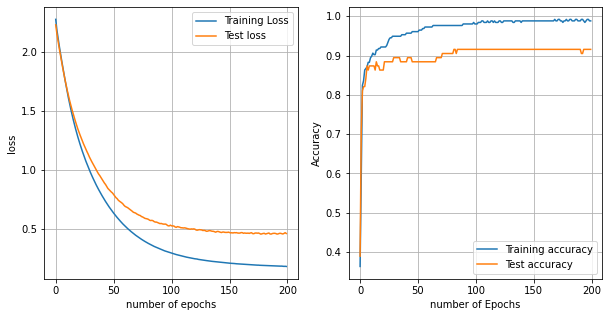

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(hist_df["loss"],label="Training Loss",zorder=3)
plt.plot(hist_df["val_loss"],label="Test loss",zorder=3)
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()

plt.subplot(122)
plt.plot(hist_df["accuracy"],label="Training accuracy",zorder=3)
plt.plot(hist_df["val_accuracy"],label="Test accuracy",zorder=3)
plt.xlabel("number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [59]:
proba_model2=tf.keras.Sequential([model2,tf.keras.layers.Softmax()])

In [60]:
y_pred=proba_model2(X_train)

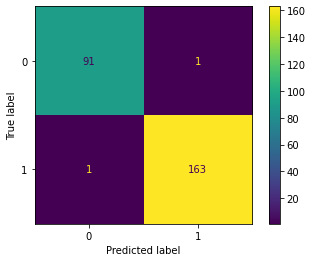

In [62]:
cm_train = confusion_matrix(y_train,np.argmax(y_pred,axis=1))
ConfusionMatrixDisplay(cm_train).plot()

In [63]:
y_pred2=proba_model2(X_test)

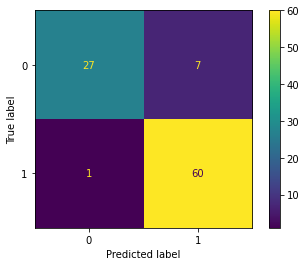

In [64]:
cm=confusion_matrix(y_test,np.argmax(y_pred2,axis=1))
ConfusionMatrixDisplay(cm).plot()

## Loading saved models

In [67]:
initializer=tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE)
regularizer=tf.keras.regularizers.L2(0.02)
model4=tf.keras.models.Sequential([
    tf.keras.layers.Dense(34,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(24,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(14,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(2)
])

In [79]:
model2.compile(optimizer="Adam",loss=loss_fn,metrics=["accuracy"])

In [80]:
res = model2.evaluate(X_test, y_test, verbose=2, return_dict=True)
res

3/3 - 0s - loss: 2.5215 - accuracy: 0.6421 - 163ms/epoch - 54ms/step


{'loss': 2.521515369415283, 'accuracy': 0.6421052813529968}

In [81]:
#early_callback = L2regularizer(monitor="val_loss",restore_best_weights=True,patience=ES_PATIENCE,verbose=1)

In [82]:
checkpoint_filepath = "weight_L2/"
model_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=True,mode='auto')

In [83]:
checkpoint_filepath

'weight_L2/'

In [86]:
history = model2.fit ( X_train, y_train,
                      validation_data=[X_test, y_test],
                      epochs=EPOCHS,
                      batch_size = BATCH_SIZE,
                      verbose = 2,
                      callbacks = [model_callback])
                        

Epoch 1/200

Epoch 1: val_loss improved from inf to 2.40955, saving model to weight_L2\
4/4 - 1s - loss: 2.4368 - accuracy: 0.6406 - val_loss: 2.4096 - val_accuracy: 0.6421 - 638ms/epoch - 160ms/step
Epoch 2/200

Epoch 2: val_loss improved from 2.40955 to 2.31714, saving model to weight_L2\
4/4 - 0s - loss: 2.3230 - accuracy: 0.6406 - val_loss: 2.3171 - val_accuracy: 0.6421 - 53ms/epoch - 13ms/step
Epoch 3/200

Epoch 3: val_loss improved from 2.31714 to 2.23896, saving model to weight_L2\
4/4 - 0s - loss: 2.2282 - accuracy: 0.6406 - val_loss: 2.2390 - val_accuracy: 0.6421 - 46ms/epoch - 12ms/step
Epoch 4/200

Epoch 4: val_loss improved from 2.23896 to 2.17231, saving model to weight_L2\
4/4 - 0s - loss: 2.1464 - accuracy: 0.6523 - val_loss: 2.1723 - val_accuracy: 0.6526 - 47ms/epoch - 12ms/step
Epoch 5/200

Epoch 5: val_loss improved from 2.17231 to 2.11139, saving model to weight_L2\
4/4 - 0s - loss: 2.0775 - accuracy: 0.6680 - val_loss: 2.1114 - val_accuracy: 0.6737 - 48ms/epoch - 12

4/4 - 0s - loss: 0.8528 - accuracy: 0.9453 - val_loss: 1.0343 - val_accuracy: 0.8632 - 53ms/epoch - 13ms/step
Epoch 42/200

Epoch 42: val_loss improved from 1.03433 to 1.01743, saving model to weight_L2\
4/4 - 0s - loss: 0.8345 - accuracy: 0.9492 - val_loss: 1.0174 - val_accuracy: 0.8632 - 47ms/epoch - 12ms/step
Epoch 43/200

Epoch 43: val_loss improved from 1.01743 to 1.00136, saving model to weight_L2\
4/4 - 0s - loss: 0.8170 - accuracy: 0.9492 - val_loss: 1.0014 - val_accuracy: 0.8632 - 50ms/epoch - 13ms/step
Epoch 44/200

Epoch 44: val_loss improved from 1.00136 to 0.98873, saving model to weight_L2\
4/4 - 0s - loss: 0.7998 - accuracy: 0.9492 - val_loss: 0.9887 - val_accuracy: 0.8632 - 46ms/epoch - 11ms/step
Epoch 45/200

Epoch 45: val_loss improved from 0.98873 to 0.97212, saving model to weight_L2\
4/4 - 0s - loss: 0.7833 - accuracy: 0.9492 - val_loss: 0.9721 - val_accuracy: 0.8526 - 47ms/epoch - 12ms/step
Epoch 46/200

Epoch 46: val_loss improved from 0.97212 to 0.95415, saving 

Epoch 82/200

Epoch 82: val_loss improved from 0.64524 to 0.63580, saving model to weight_L2\
4/4 - 0s - loss: 0.4053 - accuracy: 0.9766 - val_loss: 0.6358 - val_accuracy: 0.8737 - 53ms/epoch - 13ms/step
Epoch 83/200

Epoch 83: val_loss improved from 0.63580 to 0.62949, saving model to weight_L2\
4/4 - 0s - loss: 0.3995 - accuracy: 0.9766 - val_loss: 0.6295 - val_accuracy: 0.8632 - 53ms/epoch - 13ms/step
Epoch 84/200

Epoch 84: val_loss did not improve from 0.62949
4/4 - 0s - loss: 0.3940 - accuracy: 0.9766 - val_loss: 0.6304 - val_accuracy: 0.8737 - 32ms/epoch - 8ms/step
Epoch 85/200

Epoch 85: val_loss improved from 0.62949 to 0.62422, saving model to weight_L2\
4/4 - 0s - loss: 0.3885 - accuracy: 0.9766 - val_loss: 0.6242 - val_accuracy: 0.8632 - 61ms/epoch - 15ms/step
Epoch 86/200

Epoch 86: val_loss improved from 0.62422 to 0.61571, saving model to weight_L2\
4/4 - 0s - loss: 0.3828 - accuracy: 0.9766 - val_loss: 0.6157 - val_accuracy: 0.8737 - 56ms/epoch - 14ms/step
Epoch 87/200


Epoch 125/200

Epoch 125: val_loss did not improve from 0.52438
4/4 - 0s - loss: 0.2519 - accuracy: 0.9844 - val_loss: 0.5306 - val_accuracy: 0.8842 - 27ms/epoch - 7ms/step
Epoch 126/200

Epoch 126: val_loss did not improve from 0.52438
4/4 - 0s - loss: 0.2502 - accuracy: 0.9844 - val_loss: 0.5307 - val_accuracy: 0.8842 - 24ms/epoch - 6ms/step
Epoch 127/200

Epoch 127: val_loss did not improve from 0.52438
4/4 - 0s - loss: 0.2485 - accuracy: 0.9844 - val_loss: 0.5300 - val_accuracy: 0.8842 - 26ms/epoch - 7ms/step
Epoch 128/200

Epoch 128: val_loss improved from 0.52438 to 0.52430, saving model to weight_L2\
4/4 - 0s - loss: 0.2461 - accuracy: 0.9844 - val_loss: 0.5243 - val_accuracy: 0.8842 - 59ms/epoch - 15ms/step
Epoch 129/200

Epoch 129: val_loss did not improve from 0.52430
4/4 - 0s - loss: 0.2447 - accuracy: 0.9844 - val_loss: 0.5260 - val_accuracy: 0.8842 - 25ms/epoch - 6ms/step
Epoch 130/200

Epoch 130: val_loss improved from 0.52430 to 0.52103, saving model to weight_L2\
4/4 - 

Epoch 170/200

Epoch 170: val_loss did not improve from 0.49776
4/4 - 0s - loss: 0.1958 - accuracy: 0.9883 - val_loss: 0.5037 - val_accuracy: 0.8947 - 25ms/epoch - 6ms/step
Epoch 171/200

Epoch 171: val_loss improved from 0.49776 to 0.49311, saving model to weight_L2\
4/4 - 0s - loss: 0.1952 - accuracy: 0.9922 - val_loss: 0.4931 - val_accuracy: 0.9053 - 43ms/epoch - 11ms/step
Epoch 172/200

Epoch 172: val_loss did not improve from 0.49311
4/4 - 0s - loss: 0.1937 - accuracy: 0.9922 - val_loss: 0.4935 - val_accuracy: 0.9053 - 25ms/epoch - 6ms/step
Epoch 173/200

Epoch 173: val_loss did not improve from 0.49311
4/4 - 0s - loss: 0.1932 - accuracy: 0.9922 - val_loss: 0.5007 - val_accuracy: 0.8947 - 25ms/epoch - 6ms/step
Epoch 174/200

Epoch 174: val_loss did not improve from 0.49311
4/4 - 0s - loss: 0.1923 - accuracy: 0.9922 - val_loss: 0.5003 - val_accuracy: 0.8947 - 24ms/epoch - 6ms/step
Epoch 175/200

Epoch 175: val_loss did not improve from 0.49311
4/4 - 0s - loss: 0.1914 - accuracy: 0.

In [87]:
model2.load_weights(checkpoint_filepath)
res = model2.evaluate(X_test, y_test, verbose=2, return_dict=True)
res

3/3 - 0s - loss: 0.4826 - accuracy: 0.9158 - 18ms/epoch - 6ms/step


{'loss': 0.48263078927993774, 'accuracy': 0.9157894849777222}

In [88]:
initializer=tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE)
regularizer=tf.keras.regularizers.L2(0.02)
model2=tf.keras.models.Sequential([
    tf.keras.layers.Dense(34,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(24,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(14,
                         activation=tf.keras.activations.relu,
                         kernel_initializer=initializer,
                         kernel_regularizer=regularizer),
    tf.keras.layers.Dense(2)
])

In [89]:
checkpoint_filepath

'weight_L2/'

In [91]:
model2.compile(optimizer="Adam",loss=loss_fn,metrics=["accuracy"])

In [92]:
model2.load_weights(checkpoint_filepath)
res = model2.evaluate(X_test, y_test, verbose=2, return_dict=True)
res

3/3 - 0s - loss: 0.4826 - accuracy: 0.9158 - 181ms/epoch - 60ms/step


{'loss': 0.48263078927993774, 'accuracy': 0.9157894849777222}